# Lecture 3: Speech Signal Analysis & Feature Extraction

- Speech as a continuous signal can be modelled as a convolution between the excitation signal (vibration of the vocal cords) and the vocal tract system.
- We would want to extract the properties/features of this signal, as well as the properties of its components.
- We have two ways to do so, processing in the frequency domain and decomposing, & processing in the time domain and decomposing.

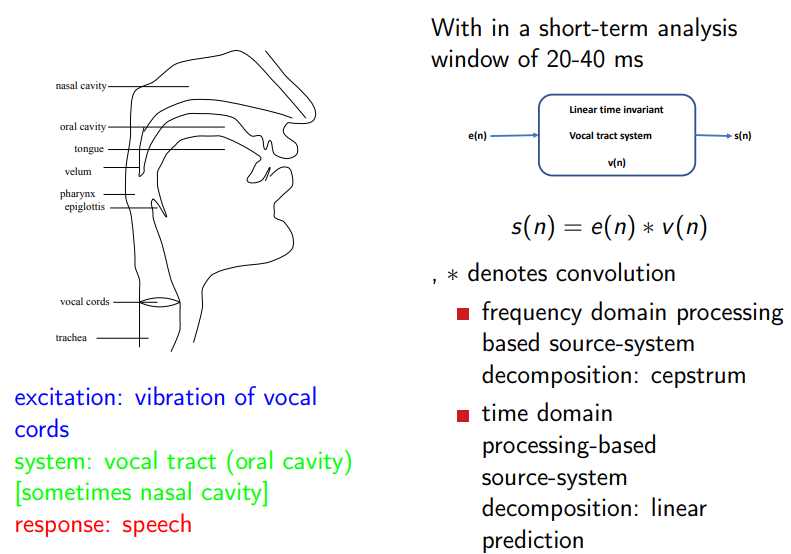

### Frequency-domain Processing & Source-System Decomposition: Cepstral Analysis

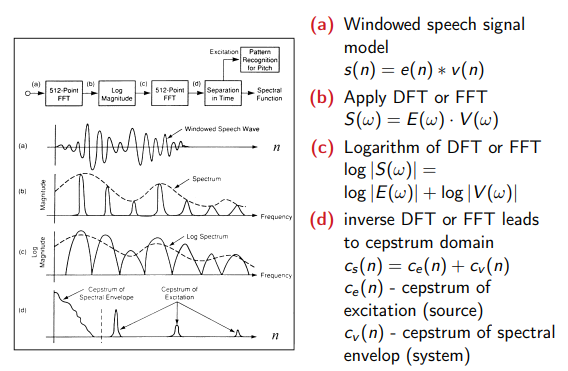

We take advantage of the mathematical properties, to convert the convolution $\ast$ into a normal multiplication $\cdot$, then the multiplication into an addition +. 

Coming back into the time domain, it is not the usual time domain, since we took the IFFT/IDFT of the $Log$ of the FFT/DFT signal, and not that of the FFT/DFT signal directly. Why we call it the cepstrum domain (as opposed to spectrum).

In the cepstrum domain, we can separate quite good (not perfectly) the excitation (source) from the spectral envelope (system).

The excitation (source) gives us the pitch, since the vibration is periodic from the vocal cords, determining the pitch. (Back to the fact that our pitch is not a perfect frequency, we are not a synthesizer, our pitch is a complex tone). 

While the cepstrum of the spectral envelope is rather concentrated near the beginning of the axis (low quefrency). The envelope is moving slowly, changing slowly.

We then decide for a boundary between both cepstrums.

### Time-domain Processing & Source-System Decomposition: Linear Prediction

People wanted to reduce and minimize the FFT computation, so they went on for the time-domain signal to decompose the signal into the source (vocal cords excitation) and the system (vocal tract).

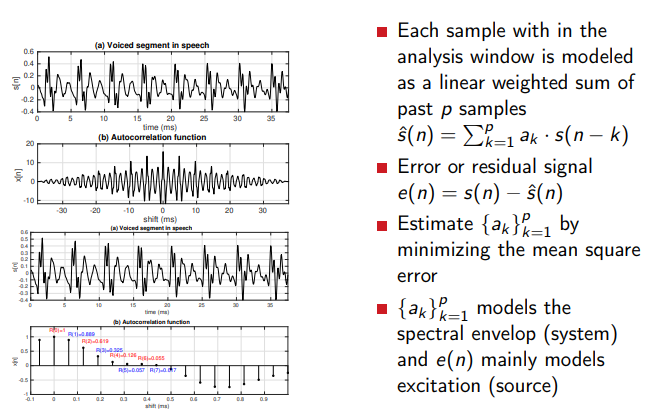

This modelled signal contains the predictable content, the properties of the voocal tract are predictable. 

While modelling `when` the excitation will happen cannot be predictable, so the source is the unpredictable content, or rather not linearly predictable.

The calculations for the time-domain computations are fast, easily optimizable, and very practical.

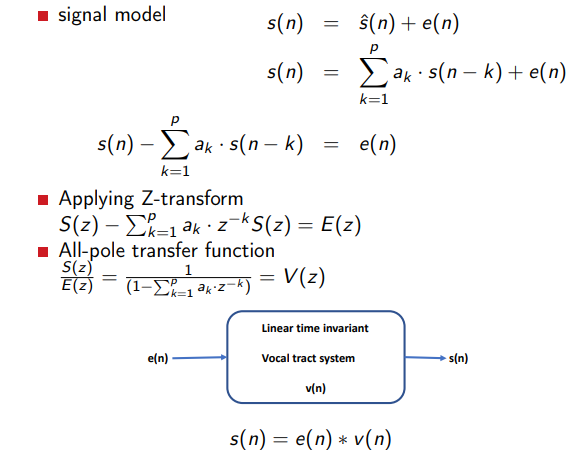


The mathematical model for the signal, after getting the coefficients $a_{k}$ can be easily obtained. And then we can easily solve for $V(z)$, the Z-transform of the system, and then convert it back to the time-domain.
The properties relevant to know would be:
$$Z[S(n)] = S(Z)$$ $$Z[S(n-k)] = Z^{-k}\cdot S(Z)$$ $$z = \exp^{j\omega}$$ gives us the Fourier transform. $$z = \exp^{-\sigma + j\omega}$$ gives us the Laplace transform.

$$Z[e(n) = S(n) - \sum_{k=1}^{P}a_{k}\cdot S(n-k)]$$ $$\triangleq E(Z) = S(Z) - \sum_{k=1}^{P} a_{k}\cdot Z^{-k}\cdot S(Z)$$ $$\triangleq E(Z) = S(Z)\cdot [1 - \sum_{k=1}^{P}a_{k}z^{-k}]$$ $$\triangleq \frac{S(Z)}{E(Z)} = \frac{1}{1 - \sum_{k=1}^{P}a_{k}z^{-k}}$$
where S(Z) is the Z-transform for the speech signal, and E(Z) is the Z-transform of the excitation signal.

And we know that $$s(n) = e(n)\ast v(n)$$ $$\triangleq S(Z) = E(Z)\cdot V(Z)$$ $$\triangleq\frac{S(Z)}{E(Z)} = V(Z)$$ So the transfer function we have is AN (and not THE) impulse response of the vocal tract (system) signal. This comes with the linear prediction assumption of the signal in time-domain.

With this function for the vocal tract signal, it will try to approximate/estimate the envelope. And the number of peaks on the envelope of the power spectrum (Energy vs Frequency) we can fit depends on the order we choose. 

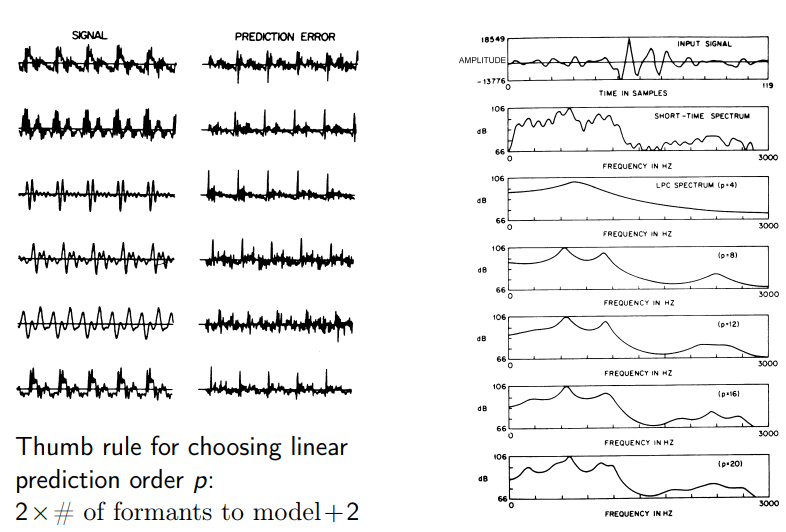

So we can extract the peaks of the envelope (aka. the formants $F_1$, $F_2$, etc...), without passing by the Fourier transform. We just have to find the solution of the transfer function. The solutions will be real & complex conjugates (because the signal is real). The complex conjugates correspond to formants $F_1$, $F_2$, etc... So if we want to fit 3 formants, we would need at least $P \ge 6$, to have the linear prediction fit the slope (2 for the real coefficients), but also the formants (2 times the wanted formants for the complex conjugate coefficients).

PS, for the complex space, if we visualize the coefficients (solutions), the angles of the conjugate points in the complex space will give us the formants. Sometimes in the envelope of the power spectrum, the formants will be broad or sharp. Sharp means the point is close to the unit circle, broad means that the point is rather close to the origin (The angle (frequency) always remains the same). The solutions will never be on the unit circle, since the system is oscillatory and it is decaying, they will always be inside the unit circle.

Arbitrarily choosing the prediction order will cause the envelope fitting random frequencies and considering them formants.

- Recap about frame size, frame shift for windows.
- Speech Recognition, we would take a frame shift of 10ms, with a frame size of 20-30ms.
- Speech Synthesis, we would take a frame shift of 5ms, with a frame size of 20-40ms.
- Separating source properties & voice tract properties, staying the time-space (aka. Cepstral Analysis & LP Analysis). We take the assumption of $v(n)$ being LTI (since we have took a short temporal window).
- $S(n) = e(n)\ast v(n)$ 

$\rightarrow (Fourier\space Transform) S(\omega) = E(\omega)\cdot V(\omega)$ 

$\rightarrow log(S(\omega)) = log[E(\omega)] + log[V(\omega)]$ 

$\rightarrow (Inverse\space Fourier\space Transform)\space C_{s}(n) = C_{E}(n) + C_{V}(n)$ 

This new space is decorrelated, as opposed to the spectral space (Frequency-domain) where the space is correlated, meaning if the energy for some frequencies is going to be high, this means that there has to be frequencies where the energies are low, because energy is fixed for the window (Time-domain & Frequency-domain) (Sum of Energies in the Frequency space HAS to be that of Energies in the Time space).

$C_{V}(n)$ focuses on the ripple structure (nice here because the signal is voiced) (aka. the pitch), while $C_{E}(n)$ focuses on the envelope.
If the signal is unvoiced, the shape of the vocal tract remains the same, so $C_{V}(n)$ remains the same, what changes significantly will be $C_{E}(n)$, caused by the periodicity of the signal, being the source (vibration of the vocal folds).

- Energy for the time-domain, we square every sample's amplitude, we get the power spectrum.
- Energy for the frequency-domain, we take the magnitude spectrum, we square for every frequency bin, we get the power spectrum, we do not need to go through the autocorrelation function and then the Fourier Transform.

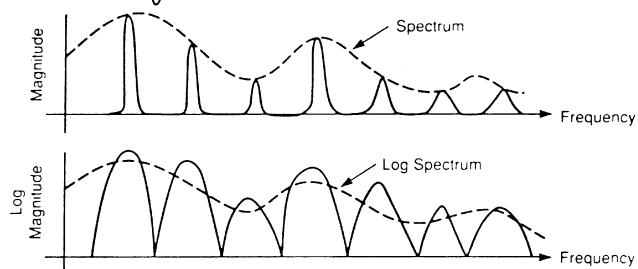

The energy distribution for all frequencies is not fixed, so a power spectrum can be seen as a Probabilistic Mass Function (PMF). We square all values and then we divide by the sum. We can use any probabilistic property to compare different spectra (euclidian distance cannot be used and makes no sense).

Since we still need Fourier Transform twice to compute the cepstrum, and it was computationally expensive, scientists wanted to search for something else to avoid these slow expensive computations, so they wanted to approximate the speech signal $S^{*}(n) = \sum_{k=1}^{P} a_{k}\cdot s(n-k)$, this holds because if we look back at the autocorrelation functions for both voiced & unvoiced speech signals respectively, we estimate a linear correlation between time samples ($R(k) = \sum_{n=0}^{N_{w}}S(n)\cdot S(n+k)$). This helps us model the signal in the case of voiced signals, but for unvoiced signals, we use the error function to model the unpredictable ($e(n) = S(n) - \hat S(n)$).

For voiced signals, the error function will be periodic, with peaks that repeat, but the usual is low (not zero), while for unvoiced signals, the error function will be aperiodic and usually high.

The RMS of the error signal (RMS(e(n))) gives us the gain, the intensity of our voice, how loud we speak.

Autocorrelation of the error function $R_{e}(k)$, we can get information about the pitch (aka. T_p), and we can compute the ratio $\frac{R(T_p)}{R(0)}$, and the closer it is to 1, the more the signal is voiced. For an unvoiced signal, we can take any peak, take its value and consider it as T_p, and compute the same ratio, it will go to 0.
This is where Pitch Detection comes in play, we first detect whether the signal is voiced or unvoiced, and if so, we compute the pitch.

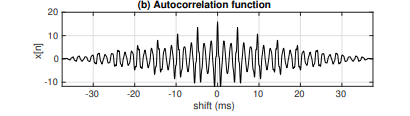

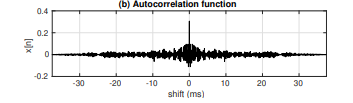

## Results: 

We therefore get a parametric representation of the speech signal, a paramertric model.

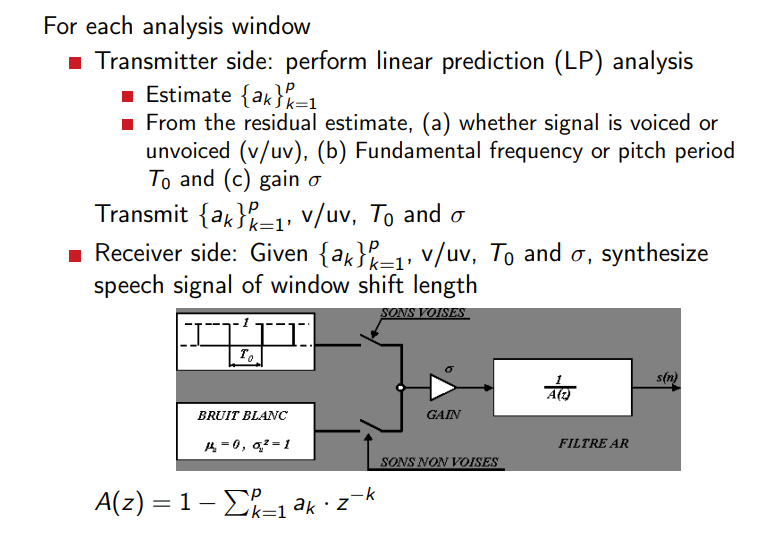

We can then easily start generating speech. Text-to-Speech & Speech-to-Speech models are called Analysis-Synthesis models.

## Feature Extraction

- In linear prediction, people found that the $a_{k}$ are correlated, and they need to be extremely precise, we cannot mess up. They wanted to convert them to the cepstral domain, having $$LPCC = IDFT[log(\frac{1}{1-\sum_{k=1}^{P}a_{k}\cdot z^{-k}})_{DFT}\space where\space z = \exp^{j\omega}]$$ gives us the Linear Prediction Cepstral Coefficients, this is modelling the a_{k} coefficients for all k, modelling the envelope of the speech signal, all depending on the choice of P.
- Until now, we were treating the Frequency as a linear space, which is not really efficient for humans, since we do not perceive all frequencies equally, we rather perceive frequencies as bands, frequencies are not all equally important $\rightarrow$ Mel scale Filter banks (Based on Pitch perception). Now we take the filter bank, apply it to the spectrum, sum all the energy in each filter bank (we get one point for each filter bank), which results in a smooth estimate of the power spectrum, then we apply the log operation, we perform $DCT$ (Discrete Cosine Transform), gives us basically the PCA of the datapoints, giving us the MFCC, the Mel Frequency Cepstral Coefficients.
- Another interesting feature to extract is to get the power spectrum, apply the Bark scale Filter bank (Based on Loudness perception) (Or even the Mel Filter bank). Then, we perform some pre-emphasis (basically a high-pass filter), instead of taking the log, we compress using cubic root, take the IDFT of the signal, and then we should know that whatever we take (DCT, IDFT), we cannot go into the cepstral space, perform Durbin Recursion, then Cepstral Recursion, and then we get the PLPCC, being the Perceptual Linear Prediction Cepstral Coefficients. Main difference between the LPCC & PLPCC is basically capture coefficients vs perception coefficients.
- All in order to represent the data, speech signal in vector format in the decorrelated space. Here we performed Linear Prediction in the Frequency domain and not in the Time domain for the first time. Frequency domain can also be used to compute the autocorrelation.

### Explanation

***Pre-emphasis:***

The glottal excitation introduced low frequencies, and suppresses high frequencies, and the lip lifts high frequencies, but still high frequencies are still de-emphasized, so we emphasize them through a high-pass filter. This is Pre-emphasis. (aka. lip filling, liftering).

$$s(n) = s(n) - \alpha\cdot s(n-1)$$

Where alpha is usually around 0.95.

Differentiation leads to a high-pass effect, meaning that any artifacts coming in the low frequencies are removed.

- The system is dynamic, even if we process windows independantly, they are not fully independant, even more, they are correlated. Each window is correlated to the next and the previous window, since every sample is too $\rightarrow$ Temporal Dynamics

***Temporal Dynamics/Derivates:***

At time point M, we get the neighbouring samples, apply this equation $$\Delta_{c_{m}} = \frac{\sum_{k=1}^{K}k\cdot(c_{m+k}-c_{m-k})}{2\cdot \sum_{k=1}^{K}k^{2}}$$ Being a time series of vectors.

We want to know how one vector changes into the other, so we take the derivatives of vectors.
$\begin{pmatrix}
C_{1}^{1} \\
C_{1}^{2} \\
... \\
C_{1}^{M}
\end{pmatrix}
\begin{pmatrix}
C_{2}^{1} \\
C_{2}^{2} \\
... \\
C_{2}^{M}
\end{pmatrix}
...
\begin{pmatrix}
C_{N}^{1} \\
C_{N}^{2} \\
... \\
C_{N}^{M}
\end{pmatrix}
$

$\begin{pmatrix}
\Delta C_{1}^{1} \\
\Delta C_{1}^{2} \\
... \\
\Delta C_{1}^{M}
\end{pmatrix}
\begin{pmatrix}
\Delta C_{2}^{1} \\
\Delta C_{2}^{2} \\
... \\
\Delta C_{2}^{M}
\end{pmatrix}
...
\begin{pmatrix}
\Delta C_{N}^{1} \\
\Delta C_{N}^{2} \\
... \\
\Delta C_{N}^{M}
\end{pmatrix}
$

Then we can take the second derivative.

$\begin{pmatrix}
\Delta\Delta C_{1}^{1} \\
\Delta\Delta C_{1}^{2} \\
... \\
\Delta\Delta C_{1}^{M}
\end{pmatrix}
\begin{pmatrix}
\Delta\Delta C_{2}^{1} \\
\Delta\Delta C_{2}^{2} \\
... \\
\Delta\Delta C_{2}^{M}
\end{pmatrix}
...
\begin{pmatrix}
\Delta\Delta C_{N}^{1} \\
\Delta\Delta C_{N}^{2} \\
... \\
\Delta\Delta C_{N}^{M}
\end{pmatrix}
$

We basically approximate the points with a Taylor series, then we fit a polynomial, and we get the vector, then we can derive the time-series.

This is basically the context, the information in a window is not independant from the previous & next windows' information.

Taking the derivative of a certain signal is basically just filtering this signal.

In order to compute a certain derivative, we do not HAVE to know the previous derivative, since derivatives are just filtered signals, we can go directly into any derivative order.

- For Speech Recognition, we can have a LP of order P = 5, enough to get up to five formants, and well enough to detect & recognize speech, and we need to have the derivative & second derivative.
- For Speaker Recognition, we need a LP of order P = 9, we need more information about the formants, we need 20 coefficients, as well as the derivative & second derivative.
- For Speech Synthesis, we need many more coefficients, around 39-40, so we need a much higher order of Linear Prediction.

So basically, for the same spectrum, we fit the envelope with different information (deeper and more detailed information) (aka. more formants and much more).

All of this was before the start of usage of Neural Networks, this was just with the beginning of Machine learning algorithms (eg. KMeans, GMMs). With Neural Networks, we can just use Filter Banks, extract their energies, take their log compression, and pass them onto the NN models, we do not have to worry about decorrelating the data anymore, nor converting it into a decorrelated space. The number of filters in the filter bank is the same number of needed dimensions for the NN input.
We do not need to worry about decorrelation, because NN can always find any order of correlation between the data.

- The fundamental frequency $F_0$ has a dynamic range, it changes all along the speech, and it is not fixed for all speakers, depending on the gender, age, and other variables. That is why we take the log compression, to compress the range. And it can and should be used with NN, since extracting it decorrelated is hard, but NN do not care whether the features are correlated or not, so they can be used directly.

- Usually, features need a statistical model to make sense, since everything changes from a speaker to another, even for the same speaker. Variables like the pitch, speech speed are changing constantly for the same speaker, and even more for different speakers. So in order to detect and recognize speech, we would need a statistical ML model.

- **Intrinsic Variability:** Variables related to the speaker, eg. health, emotion, volume, speed, etc...
- **Extrinsic Variability:** Variables related to the environment, eg. noise, weather, etc...
- Sometimes, extrinsic variability causes produces intrinsic variability, eg. when in a noisy environment, we tend to shout, etc...

## ***Lecture Questions:***

1. Describe the basic mechanism of speech production.
    - a. Speech signal is the result (convolution) of two phenomena; what are they?
    - b. Define (a) Pitch Frequency and (b) Formants.

2. Describe and Illustrate:
    - a. An analysis window: definition, typical length, shift, etc...
    - b. A power spectrum
    - c. A spectrogram
    - d. On power spectrum as well as on spectrogram, what are the typical properties of the speech signal that can be observed?

3. Describe a method for pitch frequency estimation based on: 
    - a. Time domain processing
    - b. Frequency domain processing

## ***Answer:***

1. - a. Speech signal is the result of two phenomena, the excitation source ($e(n)$), which is the sound source generated by the vibration of the vocal cords for voiced sounds or the turbulent air flow for unvoiced sounds, as well as the vocal tract system ($v(n)$), being the filter which includes the oral and sometimes nasal cavities. The shape of this tract (determined by the tongue, lips, etc..) filters the source signal. The final speech signal ($s(n)$) is the convolution of both the excitation signal and the vocal tract system's impulse response: $s(n) = e(n)\ast v(n)$

    - b. The pitch frequency is the perceptual correlate of the fundamental frequency ($F_{0}$). This frequency is determines by the rate of vibration of the vocal cords, which isi a characteristic of the excitation source. While formants are the resonance peaks of the vocal tract system. They are visible as the peaks in the spectral envelope (the overall shape of the specctrum). The specific frequencies of the formants are what allows us to distinguish between different vowel sounds.

2. - a. An analysis window is a function that isolates a small segment of the speech signal for processing, for the speech to be considered relatively stationary. Its typical length is usually 20~40ms, and its shift is shorter than its length to have some overlap between subsequent frames, so a typical window shift would be 10ms.

    - b. A power spectrum is a DFT spectrum that shows the energy (magnitude) present at different frequencies for a single analysis window.
    - c. A spectrogram is a visualization of how the power spectrum of a signal changes over time. It plots time on one axis, frequency on the other, and uses intensity to represent the energy at each time-frequency point. (3D plot)
    - d. For both the power spectrum and the spectrogram, we can observe the properties of the source and the system. 
        + Power Spectrum: The pitch (source) is visible (for voiced speech) as a series of distinct, evenly spaced spikes. The frequency of the first spike eisi the fundamental frequency ($F_{0}$), and the subsequent spikes are its harmonics (integer multiples of it). The formants (system) are visible as the borad peaks in the overall spectral envelope (the shape that the harmonic spikes follow).
        +  Spectrogram: The pitch (source) is visible (for voiced speech) as fine vertical striations (lines) that correspond to the individual periodic vibrations of the vocal cords. The formants (system) are clearly visible as dark, horizontal bands, which represent high-energy resonance frequencies. We can these bands move up and down over time as the speaker articulates dfferent counds. 

    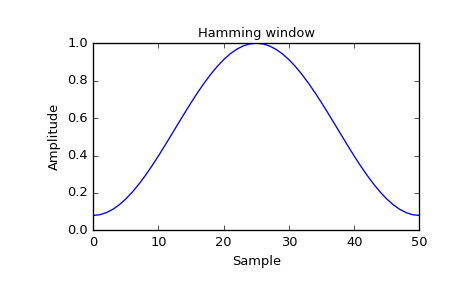

    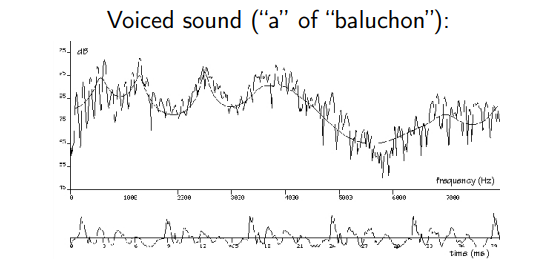

    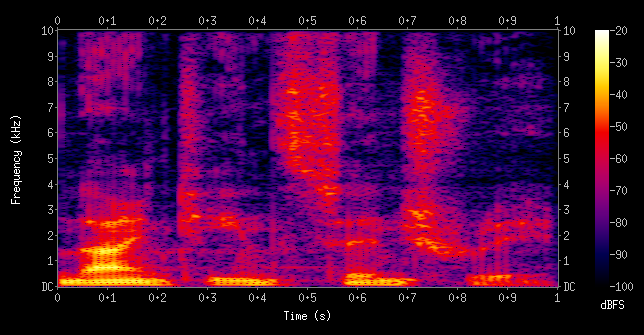

3. - a. Estimating the Pitch Frequency using time-based processing: Autocorrelation. The autocorrelation function can be used to find the fundamental period ($T_{0}$) of a voiced speech segment. Since voiced speech is periodic, the autocorrelation function is periodic too. The autocorrelation function measures the similarity of the signal with a delayed copy of itself. So it will show a strong peak at a time lag equal to the fundamental period ($T_{0}$), other than the center peak at time T=0. By finding this location, we can determine ($T_{0}$, and the pitch is $F_{0} = \frac{1}{T_{0}}$).

    - b. Estimating the Pitch Frequency using frequency-based processing: Cepstral Analysis. Computing the cepstrum of the signal, to do so, we take the FFT of the signal, then the log of the magnitude, and then an inverse FFT. This converts the multiplicative relationship in the spectrum $S(\omega) = V(\omega)\cdot E(\omega)$ into an additive one $c_{s} = c_{v} + c_{e}$. We will find the vocal tract properties (formants) (system), being a slowly changing envelope in the spectrum, it gets mapped to the low-time region of the cepstrum. While the pitch (and its harmonics) (excitation), being a rapidly changing periodic component in the spectrum, it gets mapped to a distant peak at a specific time lag (Cepstrum of Excitation). This time lag is the fundamental period ($T_{0}$), then we can compute the fundamental frequency $F_{0} = \frac{1}{T_{0}}$